<h3> Assignment - 5</h3>


 Original Data 



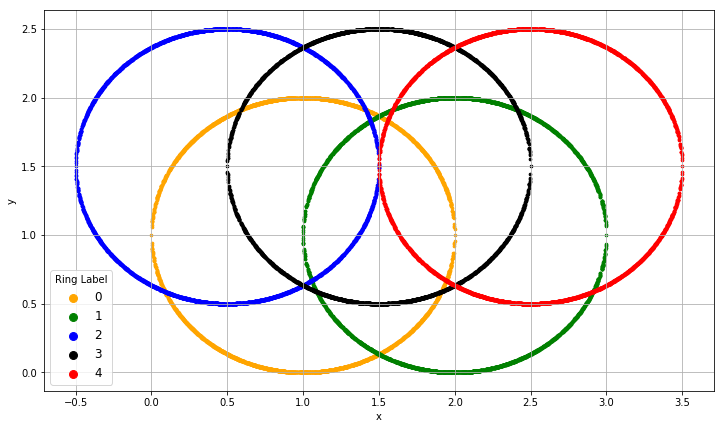

In [2]:
import pandas 
import numpy 
import matplotlib.pyplot as plt
import statsmodels.api as smodel
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import random

#Read the original data and visualize it 
ringsdata=pandas.read_csv('FiveRing.csv')
rings=ringsdata.dropna()
print("\n Original Data \n")
predData=rings[['x','y']]
targetData=rings[['ring']]
count=len(rings)

#Visualization of orignial data
carray = ['orange', 'green', 'blue','black','red']
plt.figure(figsize=(12,7))
for i in range(5):
    subData = rings[rings['ring'] == i]
    plt.scatter(x = subData['x'],
                y = subData['y'], c = carray[i], label = i, s = 7)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.axis(aspect = 'equal')
plt.legend(title = 'Ring Label', fontsize = 12, markerscale = 3)
plt.show()

In [3]:
#Building a Multinomial Logistic Model without Bagging and finding estimates

import sklearn.metrics as metrics
y = rings['ring'].astype('category')
y_category = y.cat.categories

X = predData
X = smodel.add_constant(X, prepend=True)

logit = smodel.MNLogit(y, X)
print("Name of Target Variable:", logit.endog_names)
print("Name(s) of Predictors:", logit.exog_names)

thisFit = logit.fit(method='newton',maxiter = 1000,tol = 1e-7)
thisParameter = thisFit.params

print("Model Parameter Estimates:\n", thisFit.params)
print("Model Log-Likelihood Value:\n", logit.loglike(thisParameter.values))

y_predProb = thisFit.predict(X)
y_predict = pandas.to_numeric(y_predProb.idxmax(axis=1))

y_predictClass = y_category[y_predict]

y_accuracy = metrics.accuracy_score(y, y_predictClass)
print("Accuracy Score = ", y_accuracy)
print("Misclassification Rate = ", 1-y_accuracy)

c:\users\spver\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Name of Target Variable: ring
Name(s) of Predictors: ['const', 'x', 'y']
Optimization terminated successfully.
         Current function value: 1.120803
         Iterations 7
Model Parameter Estimates:
               0         1         2         3
const -4.435535  0.187691 -2.701434 -8.702577
x      2.953259 -1.467861  1.455439  4.438213
y      0.000669  0.720070  0.694733  0.719375
Model Log-Likelihood Value:
 -22427.266008737428
Accuracy Score =  0.41199400299850075
Misclassification Rate =  0.5880059970014992


<h3> Ans - 1(a) </h3>

In [4]:
print("Model Parameter Estimates:")
thisFit.params


Model Parameter Estimates:


,0,1,2,3
const,-4.435535,0.187691,-2.701434,-8.702577
x,2.953259,-1.467861,1.455439,4.438213
y,0.000669,0.720070,0.694733,0.719375


<h3> Ans - 1(b) </h3>

In [5]:
print("Misclassification Rate = {:.6f}".format(1-y_accuracy))

Misclassification Rate = 0.588006


<h3> Ans - 1(c) </h3>

In [7]:
ringslogit=rings.drop(columns='ring')
ringslogit['logitring']=y_predictClass
predprob=y_predProb.values
RASE=0
for i in range(count):
    for j in range (5):
        if(targetData['ring'].iloc[i]==j):
            RASE += (1.0 - predprob[i][j])**2
        else:
            RASE += (0.0 - predprob[i][j])**2
RASE = numpy.sqrt(RASE / (2*count))
print("Root Average Squared Error = {:.6f}".format(RASE))


Root Average Squared Error = 0.558195


<h3> Ans - 1(d)</h3>

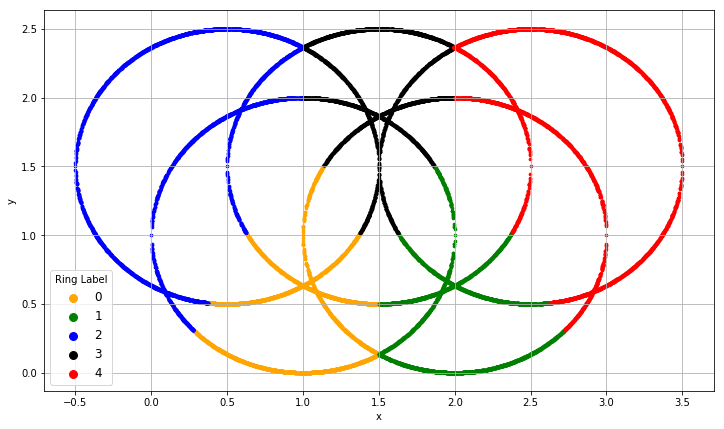

In [8]:
#Plotting the data using the predicted class obtained in the MNlogit Model without bagging

carray = ['orange', 'green', 'blue','black','red']
plt.figure(figsize=(12,7))
for i in range(5):
    subData = ringslogit[ringslogit['logitring'] == i]
    plt.scatter(x = subData['x'],
                y = subData['y'], c = carray[i], label = i, s = 7)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.axis(aspect = 'equal')
plt.legend(title = 'Ring Label', fontsize = 12, markerscale = 3)
plt.show()

<h3> Ans - 1(e) Ans - 1(f) Ans - 1(g)</h3>

In [7]:
#Create Sample for bootstrap method

def sample_wr (inData):
    n = len(inData)
    outData = numpy.empty((n,1))
    for i in range(n):
        j = int(random.random() * n)
        outData[i] = inData[j]
    return outData

#Perform bagging and return the average probability to get the predicted class

def bootstrap_classTree (x_train, y_train, nB):
    x_index = x_train.index
    nT = len(y_train)
    outProb = numpy.zeros((nT,5))
    LR=LogisticRegression(solver='newton-cg',multi_class='multinomial',max_iter=1000)


# Initialize internal state of the random number generator.
    random.seed(20190430)

#Bagging Process
    for iB in range(nB):
        bootIndex = sample_wr(x_index)
        x_train_boot = x_train.loc[bootIndex[:,0]]
        y_train_boot = y_train.loc[bootIndex[:,0]]
        treeFit = LR.fit(x_train_boot, y_train_boot['ring'])
        outProb = outProb + LR.predict_proba(x_train)
    outProb = outProb / nB
    return outProb

In [8]:
#Metrics to calculate the Misclassifciation Rate, Root Average Squared Error and Plotting graph after bagging method

def Metrics(PredProb,accuracy,baggingProb):
    #print("Misclassification Rate = {:.6f}".format(1-accuracy))
    
    MisClass=1-accuracy
    
    RASE=0
    for i in range(count):
        for j in range (5):
            if(targetData['ring'].iloc[i]==j):
                RASE += (1.0 - PredProb[i][j])**2
            else:
                RASE += (0.0 - PredProb[i][j])**2
    RASE = numpy.sqrt(RASE / (2*count))
    #print("Root Average Squared Error = {:.6f}".format(RASE))

    ringsBagging=rings.drop(columns='ring')
    ringsBagging['ring']=baggingProb['ring']
    carray = ['orange', 'green', 'blue','black','red']
    plt.figure(figsize=(12,7))
    for i in range(5):
        subData = ringsBagging[ringsBagging['ring'] == i]
        plt.scatter(x = subData['x'],
                    y = subData['y'], c = carray[i], label = i, s = 7)
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis(aspect = 'equal')
    plt.legend(title = 'Ring Label', fontsize = 12, markerscale = 3)
    plt.show()
    
    return(MisClass,RASE)

<h3> Bagging for 10 iterations </h3>

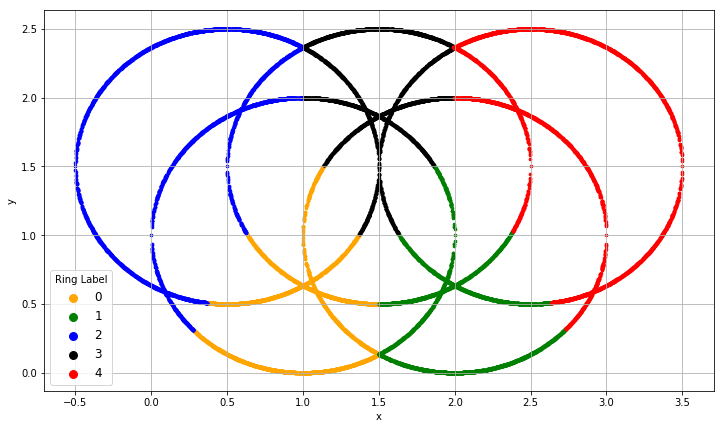

Misclassification Rate for 10 iterations = 0.588156

Root Average Sqaured Error for 10 iterations = 0.558191



In [9]:
nB = 10
# Calling the bagging process, storing the average probability obatined and finding predicted class from it
PredProb=bootstrap_classTree (predData, targetData, nB)
baggingProb=pandas.DataFrame(PredProb)
baggingProb['ring']=baggingProb.idxmax(axis=1).astype(int)

#Metrics of Bagging for 10 iterations
accuracy=metrics.accuracy_score(targetData['ring'],baggingProb['ring'])
MisClassRate,Rerror=Metrics(PredProb,accuracy,baggingProb)
print("Misclassification Rate for {:} iterations = {:.6f}\n".format(nB,MisClassRate))
print("Root Average Sqaured Error for {:} iterations = {:.6f}\n".format(nB,Rerror))

<h3> Bagging for 20 iterations </h3>

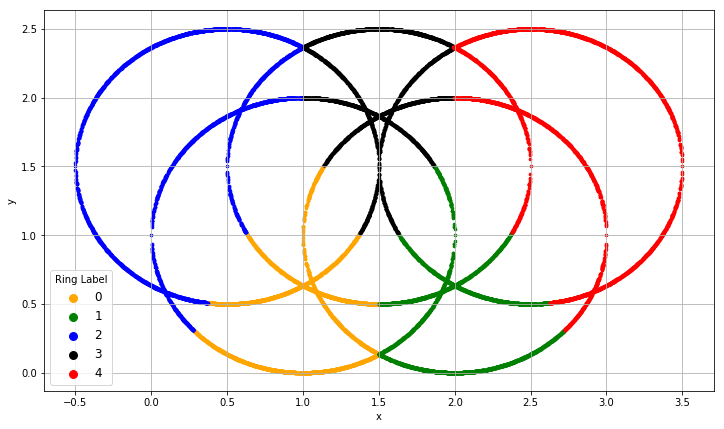

Misclassification Rate for 20 iterations = 0.588256

Root Average Sqaured Error for 20 iterations = 0.558152



In [10]:
nB = 20
# Calling the bagging process, storing the average probability obatined and finding predicted class from it
PredProb=bootstrap_classTree (predData, targetData, nB)
baggingProb=pandas.DataFrame(PredProb)
baggingProb['ring']=baggingProb.idxmax(axis=1).astype(int)

#Metrics of Bagging for 20 iterations
accuracy=metrics.accuracy_score(targetData['ring'],baggingProb['ring'])
MisClassRate,Rerror=Metrics(PredProb,accuracy,baggingProb)
print("Misclassification Rate for {:} iterations = {:.6f}\n".format(nB,MisClassRate))
print("Root Average Sqaured Error for {:} iterations = {:.6f}\n".format(nB,Rerror))

<h3> Bagging for 30 iterations </h3>

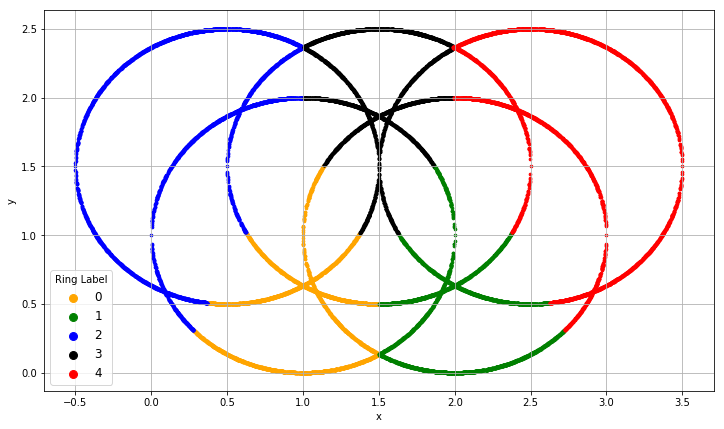

Misclassification Rate for 30 iterations = 0.588156

Root Average Sqaured Error for 30 iterations = 0.558136



In [11]:
nB = 30
# Calling the bagging process, storing the average probability obatined and finding predicted class from it
PredProb=bootstrap_classTree (predData, targetData, nB)
baggingProb=pandas.DataFrame(PredProb)
baggingProb['ring']=baggingProb.idxmax(axis=1).astype(int)

#Metrics of Bagging for 30 iterations
accuracy=metrics.accuracy_score(targetData['ring'],baggingProb['ring'])
MisClassRate,Rerror=Metrics(PredProb,accuracy,baggingProb)
print("Misclassification Rate for {:} iterations = {:.6f}\n".format(nB,MisClassRate))
print("Root Average Sqaured Error for {:} iterations = {:.6f}\n".format(nB,Rerror))

<h3> Bagging for 40 iterations </h3>

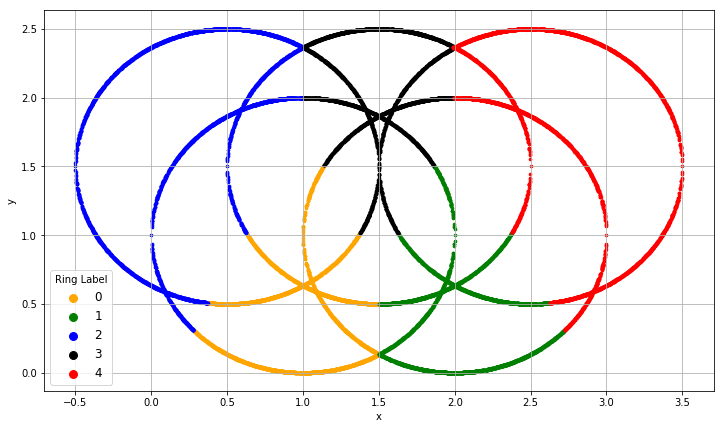

Misclassification Rate for 40 iterations = 0.588156

Root Average Sqaured Error for 40 iterations = 0.558139



In [12]:
nB = 40
# Calling the bagging process, storing the average probability obatined and finding predicted class from it
PredProb=bootstrap_classTree (predData, targetData, nB)
baggingProb=pandas.DataFrame(PredProb)
baggingProb['ring']=baggingProb.idxmax(axis=1).astype(int)

#Metrics of Bagging for 40 iterations
accuracy=metrics.accuracy_score(targetData['ring'],baggingProb['ring'])
MisClassRate,Rerror=Metrics(PredProb,accuracy,baggingProb)
print("Misclassification Rate for {:} iterations = {:.6f}\n".format(nB,MisClassRate))
print("Root Average Sqaured Error for {:} iterations = {:.6f}\n".format(nB,Rerror))

<h3> Bagging for 50 iterations </h3>

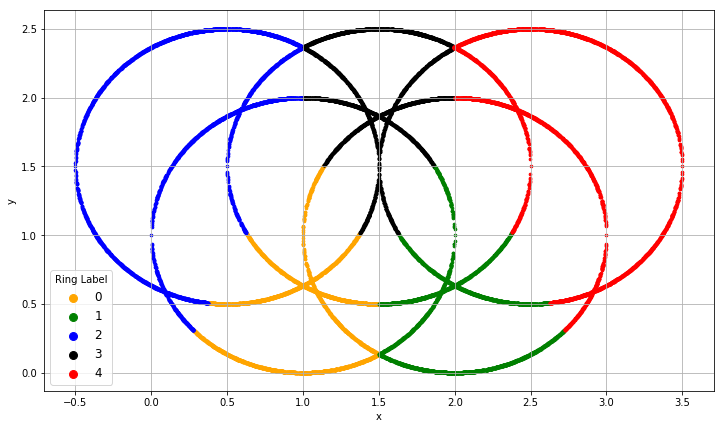

Misclassification Rate for 50 iterations = 0.588106

Root Average Sqaured Error for 50 iterations = 0.558143



In [13]:
nB = 50
# Calling the bagging process, storing the average probability obatined and finding predicted class from it
PredProb=bootstrap_classTree (predData, targetData, nB)
baggingProb=pandas.DataFrame(PredProb)
baggingProb['ring']=baggingProb.idxmax(axis=1).astype(int)

#Metrics of Bagging for 50 iterations
accuracy=metrics.accuracy_score(targetData['ring'],baggingProb['ring'])
MisClassRate,Rerror=Metrics(PredProb,accuracy,baggingProb)
print("Misclassification Rate for {:} iterations = {:.6f}\n".format(nB,MisClassRate))
print("Root Average Sqaured Error for {:} iterations = {:.6f}\n".format(nB,Rerror))

<h3> Bagging for 60 iterations </h3>

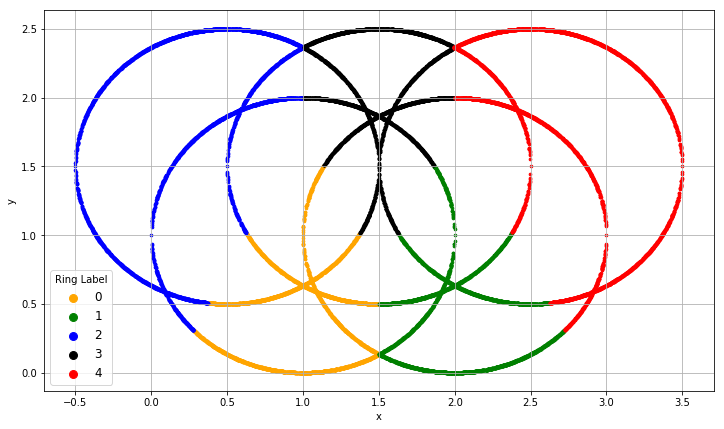

Misclassification Rate for 60 iterations = 0.588056

Root Average Sqaured Error for 60 iterations = 0.558147



In [14]:
nB = 60
# Calling the bagging process, storing the average probability obatined and finding predicted class from it
PredProb=bootstrap_classTree (predData, targetData, nB)
baggingProb=pandas.DataFrame(PredProb)
baggingProb['ring']=baggingProb.idxmax(axis=1).astype(int)

#Metrics of Bagging for 60 iterations
accuracy=metrics.accuracy_score(targetData['ring'],baggingProb['ring'])
MisClassRate,Rerror=Metrics(PredProb,accuracy,baggingProb)
print("Misclassification Rate for {:} iterations = {:.6f}\n".format(nB,MisClassRate))
print("Root Average Sqaured Error for {:} iterations = {:.6f}\n".format(nB,Rerror))

<h3> Bagging for 70 iterations </h3>

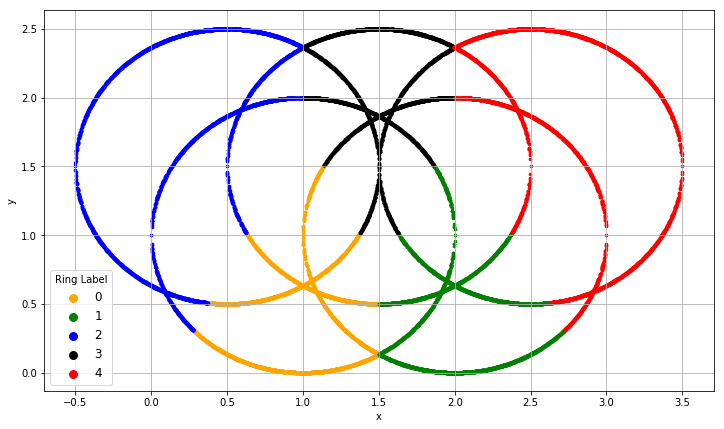

Misclassification Rate for 70 iterations = 0.587906

Root Average Sqaured Error for 70 iterations = 0.558149



In [15]:
nB = 70
# Calling the bagging process, storing the average probability obatined and finding predicted class from it
PredProb=bootstrap_classTree (predData, targetData, nB)
baggingProb=pandas.DataFrame(PredProb)
baggingProb['ring']=baggingProb.idxmax(axis=1).astype(int)

#Metrics of Bagging for 70 iterations
accuracy=metrics.accuracy_score(targetData['ring'],baggingProb['ring'])
MisClassRate,Rerror=Metrics(PredProb,accuracy,baggingProb)
print("Misclassification Rate for {:} iterations = {:.6f}\n".format(nB,MisClassRate))
print("Root Average Sqaured Error for {:} iterations = {:.6f}\n".format(nB,Rerror))

<h3> Bagging for 80 iterations </h3>

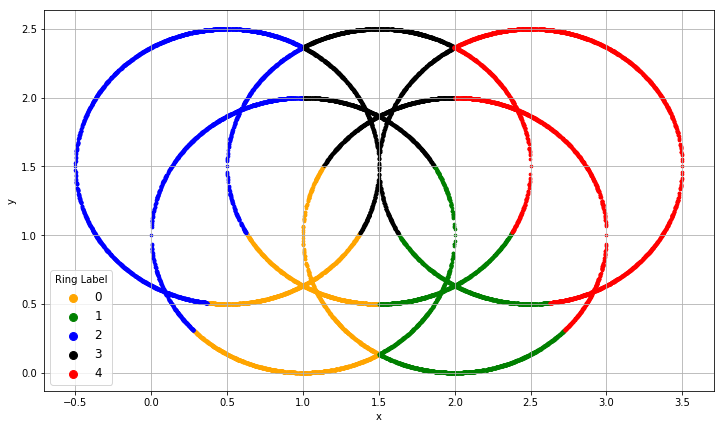

Misclassification Rate for 80 iterations = 0.588106

Root Average Sqaured Error for 80 iterations = 0.558152



In [16]:
nB = 80
# Calling the bagging process, storing the average probability obatined and finding predicted class from it
PredProb=bootstrap_classTree (predData, targetData, nB)
baggingProb=pandas.DataFrame(PredProb)
baggingProb['ring']=baggingProb.idxmax(axis=1).astype(int)

#Metrics of Bagging for 80 iterations
accuracy=metrics.accuracy_score(targetData['ring'],baggingProb['ring'])
MisClassRate,Rerror=Metrics(PredProb,accuracy,baggingProb)
print("Misclassification Rate for {:} iterations = {:.6f}\n".format(nB,MisClassRate))
print("Root Average Sqaured Error for {:} iterations = {:.6f}\n".format(nB,Rerror))

<h3> Bagging for 90 iterations </h3>

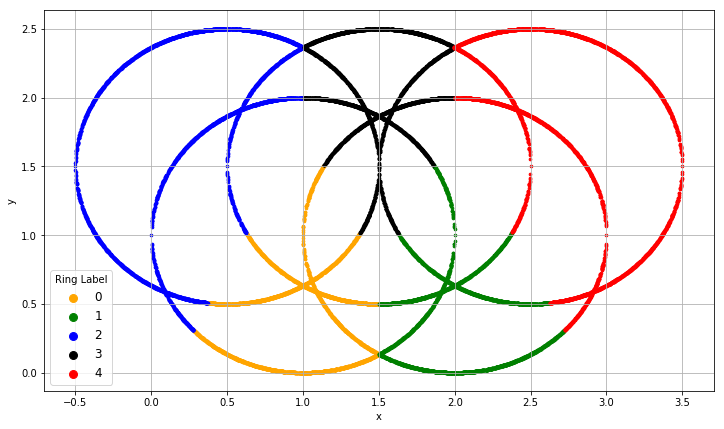

Misclassification Rate for 90 iterations = 0.588056

Root Average Sqaured Error for 90 iterations = 0.558152



In [17]:
nB = 90
# Calling the bagging process, storing the average probability obatined and finding predicted class from it
PredProb=bootstrap_classTree (predData, targetData, nB)
baggingProb=pandas.DataFrame(PredProb)
baggingProb['ring']=baggingProb.idxmax(axis=1).astype(int)

#Metrics of Bagging for 90 iterations
accuracy=metrics.accuracy_score(targetData['ring'],baggingProb['ring'])
MisClassRate,Rerror=Metrics(PredProb,accuracy,baggingProb)
print("Misclassification Rate for {:} iterations = {:.6f}\n".format(nB,MisClassRate))
print("Root Average Sqaured Error for {:} iterations = {:.6f}\n".format(nB,Rerror))


<h3> Bagging for 100 iterations </h3>

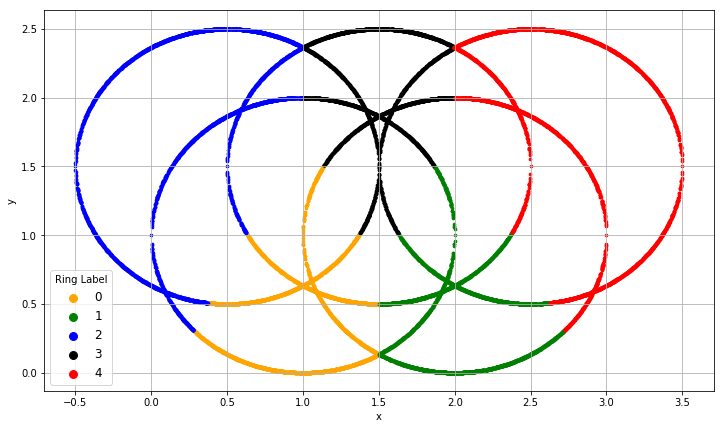

Misclassification Rate for 100 iterations = 0.588056

Root Average Sqaured Error for 100 iterations = 0.558151



In [18]:
nB = 100
# Calling the bagging process, storing the average probability obatined and finding predicted class from it
PredProb=bootstrap_classTree (predData, targetData, nB)
baggingProb=pandas.DataFrame(PredProb)
baggingProb['ring']=baggingProb.idxmax(axis=1).astype(int)

#Metrics of Bagging for 100 iterations
accuracy=metrics.accuracy_score(targetData['ring'],baggingProb['ring'])
MisClassRate,Rerror=Metrics(PredProb,accuracy,baggingProb)
print("Misclassification Rate for {:} iterations = {:.6f}\n".format(nB,MisClassRate))
print("Root Average Sqaured Error for {:} iterations = {:.6f}\n".format(nB,Rerror))